In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 38.2 MB/s 
     |████████████████████████████████| 1.6 MB 54.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
import keras_tuner as kt
from tensorflow.python import metrics

# Model Implementation

**Read file**

In [ ]:
df=pd.read_csv("/content/players_data.csv")

In [ ]:
df.head()

,Unnamed: 0,name,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,cat_pos,position_DEF,position_FWD,position_GK,position_GKP,position_MID
0,0,Aaron Connolly,Brighton,2.1,0,0,-0.577658,0,-0.419363,-1.352937,...,0.196416,0.065203,-0.491967,-0.385999,FWD,0,1,0,0,0
1,1,Michail Antonio,West Ham,3.4,2,3,3.693568,0,1.423347,0.392776,...,-0.434511,-0.042959,0.213122,0.282991,FWD,0,1,0,0,0
2,2,Arthur Masuaku,West Ham,2.0,0,0,-0.577658,0,-0.419363,0.413254,...,-0.434511,-0.042959,0.213122,0.282991,DEF,1,0,0,0,0
3,3,Michael Olise,Crystal Palace,0.0,0,0,-0.577658,0,-0.419363,0.653865,...,-0.434511,0.065203,-0.726996,0.059994,MID,0,0,0,0,1
4,4,Michael Obafemi,Southampton,1.0,0,0,-0.577658,0,-0.419363,0.060015,...,-0.686881,-0.151120,-0.256937,-0.720494,FWD,0,1,0,0,0


**Spliting data to features and target and drop useless features**

In [ ]:
feature = df.drop(['Unnamed: 0','total_points', "team","GW","round"],axis = 1)
target = df['total_points']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0)

In [ ]:
X_train_name_value_pos=X_train[["name","value","cat_pos"]]
X_test_name_value_pos=X_test[["name","value","cat_pos"]]

In [ ]:
X_train.drop(["name","value","cat_pos"],axis=1,inplace=True)
X_test.drop(["name","value","cat_pos"],axis=1,inplace=True)

**change data type to tensor**

In [ ]:
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)

In [ ]:
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)

In [ ]:
X_train.shape

TensorShape([18555, 47])

In [ ]:
y_train.shape

TensorShape([18555])

**Define Sequential model with 4 layers**

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  hp_layer_2 = hp.Int("layer_2",min_value=1,max_value=100)
  hp_layer_3 = hp.Int("layer_3",min_value=1,max_value=100)

  model.add(tf.keras.layers.Dense(47,activation="relu",input_dim=47,name="input_layer"))
  model.add(tf.keras.layers.Dense(units=hp_layer_2,activation="relu",name="L2"))
  model.add(tf.keras.layers.Dense(units=hp_layer_3,activation="relu",name="L3"))
  model.add(tf.keras.layers.Dense(1,activation="linear",name="output_layer"))

  model.compile(optimizer="adam",loss="mse",metrics=[['mse',"mae"]])


  return model

In [ ]:
tuner =kt.Hyperband(model_builder,objective=["mse","mae"],max_epochs=50)

In [ ]:
#stop_early= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)

In [ ]:
from pandas.core.common import random_state
tuner.search(X_train,y_train,epochs=50,validation_split=0.2)

Trial 90 Complete [00h 01m 23s]
multi_objective: 4.039985775947571

Best multi_objective So Far: 3.9427794218063354
Total elapsed time: 00h 30m 12s


In [ ]:
best_hp=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model=tuner.hypermodel.build(best_hp)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 47)                2256      
                                                                 
 L2 (Dense)                  (None, 69)                3312      
                                                                 
 L3 (Dense)                  (None, 70)                4900      
                                                                 
 output_layer (Dense)        (None, 1)                 71        
                                                                 
Total params: 10,539
Trainable params: 10,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
layer_2: 69
layer_3: 70
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 3.9427794218063354
Trial summary
Hyperparameters:
layer_2: 66
layer_3: 57
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.039985775947571
Trial summary
Hyperparameters:
layer_2: 88
layer_3: 47
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.09403783082962
Trial summary
Hyperparameters:
layer_2: 79
layer_3: 34
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.320057392120361
Trial summary
Hyperparameters:
layer_2: 50
layer_3: 83
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0078
Score: 4.529072046279907
Trial summary
Hyperparameters:
layer_2: 16
layer_3: 51
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 4.5708718299865

In [ ]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=10)

Epoch 1/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.7264 - mse: 4.7264 - mae: 1.1895 - val_loss: 4.0421 - val_mse: 4.0421 - val_mae: 1.1599
Epoch 2/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.4436 - mse: 4.4436 - mae: 1.1473 - val_loss: 3.9099 - val_mse: 3.9099 - val_mae: 1.1065
Epoch 3/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.4067 - mse: 4.4067 - mae: 1.1358 - val_loss: 3.8612 - val_mse: 3.8612 - val_mae: 1.0744
Epoch 4/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.3624 - mse: 4.3624 - mae: 1.1315 - val_loss: 3.8484 - val_mse: 3.8484 - val_mae: 1.0796
Epoch 5/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.3464 - mse: 4.3464 - mae: 1.1260 - val_loss: 3.8952 - val_mse: 3.8952 - val_mae: 1.1432
Epoch 6/50
1485/1485 [==============================] - 5s 3ms/step - loss: 4.3129 - mse: 4.3129 - mae: 1.1242 - val_loss: 3.8275 - val_mse: 3.8275 - val_mae: 1.0416
Epoc

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
45,3.329032,3.329032,0.982282,4.096197,4.096197,1.056826,45
46,3.320274,3.320274,0.980862,4.218955,4.218955,1.103727,46
47,3.334872,3.334872,0.982976,4.081503,4.081503,1.040142,47
48,3.280641,3.280641,0.970589,4.100538,4.100538,1.073796,48
49,3.286398,3.286398,0.974709,4.118140,4.118140,1.089784,49


**model accuracy and loss graph**

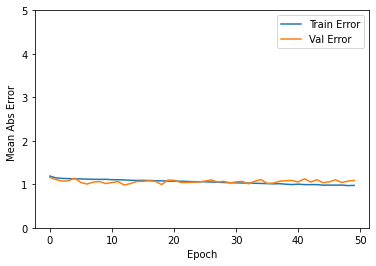

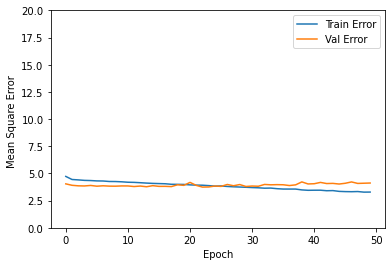

In [ ]:
def plot_history(history):
  hist = pd.DataFrame (history.history)
  hist ['epoch'] = history. epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error  ')
  plt.plot(hist ['epoch'], hist['mae'],label='Train Error')
  plt.plot(hist ['epoch'], hist['val_mae'],label = 'Val Error')
  plt. legend ()
  plt.ylim([0,5])
  plt. figure ()
  plt.xlabel('Epoch')
  plt.ylabel( 'Mean Square Error ')
  plt.plot (hist ['epoch'], hist ['mse'],
  label='Train Error')
  plt.plot (hist ['epoch'], hist ['val_mse'],
  label = 'Val Error')
  plt. legend ()
  plt.ylim( [0,20])
plot_history(history)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)



145/145 [==============================] - 0s 2ms/step - loss: 4.4277 - mse: 4.4277 - mae: 1.1295


In [ ]:
pred=model.predict(X_test)

145/145 [==============================] - 0s 1ms/step


In [ ]:
pred 

array([[ 0.13908976],
       [ 3.7507532 ],
       [ 2.9459434 ],
       ...,
       [-0.09113228],
       [ 0.11057556],
       [ 0.3426648 ]], dtype=float32)

In [ ]:
shape=pred.shape
shape

(4639, 1)

In [ ]:
y_test=y_test.numpy()

In [ ]:
y_test.shape

(4639,)

In [ ]:
y_test

array([0, 2, 2, ..., 0, 0, 0])

In [ ]:
pred=pred.reshape((shape[0]))

In [ ]:
for i in range(20):
  print(f"predected: {pred[i]},    expected: {y_test[i]}")

predected: 0.13908976316452026,    expected: 0
predected: 3.750753164291382,    expected: 2
predected: 2.9459433555603027,    expected: 2
predected: -0.011721819639205933,    expected: 0
predected: 0.19304102659225464,    expected: 0
predected: 0.005647242069244385,    expected: 1
predected: 3.064751625061035,    expected: 6
predected: 0.30692559480667114,    expected: 1
predected: 0.230160653591156,    expected: 0
predected: 0.04817810654640198,    expected: 0
predected: 0.18804948031902313,    expected: 0
predected: 0.010675936937332153,    expected: 0
predected: 1.9885932207107544,    expected: 0
predected: 0.2382705807685852,    expected: 4
predected: 2.828984260559082,    expected: 3
predected: 1.0955339670181274,    expected: 0
predected: 1.880294919013977,    expected: 2
predected: -0.050569087266922,    expected: 0
predected: 0.3481844365596771,    expected: 0
predected: 2.1679439544677734,    expected: 1


In [ ]:
pred=np.round(pred)

In [ ]:
points_result = pd.DataFrame({"player name":X_test_name_value_pos["name"],
                              'Actual point': y_test, 
                              'Predicted point': pred,
                              "player value":X_test_name_value_pos['value'],"position":X_test_name_value_pos["cat_pos"]})
points_result.to_csv("points_result_mahmoud.csv")

In [ ]:
points_result.head()

,player name,Actual point,Predicted point,player value,position
4026,Jarosław Jach,0,0.0,44,DEF
5453,Liam Cooper,2,4.0,45,DEF
22934,Adam Webster,2,3.0,43,DEF
22608,Louie Moulden,0,-0.0,40,GK
438,James Justin,0,0.0,50,DEF
